In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [2]:
df_original = pd.read_csv('data.csv')
df_original.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Analysing the basic metrics

In [3]:
df_original.shape 

(8807, 12)

- which shows that data contains 8807 rows 12 columns

In [63]:
df_original.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 13 columns):
show_id           8790 non-null object
type              8790 non-null object
title             8790 non-null object
director          8790 non-null object
cast              8790 non-null object
country           8790 non-null object
date_added        8790 non-null datetime64[ns]
release_year      8790 non-null int64
rating            8790 non-null object
duration          8790 non-null object
listed_in         8790 non-null object
description       8790 non-null object
duration_value    8790 non-null int64
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 961.4+ KB


With above query we can conclude that below columns have null values

1.   director
2.   cast
3.   country
4.   date_added
5.   rating
6.   duration

In [5]:
df_original.describe(include=[np.number]) # which gives only numerical data type column details

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
df_original.describe(include=[np.object]) # which gives object data type column details

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s3393,Movie,White Boy,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [7]:
df_original.isnull().sum()/len(df_original)*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

Observation: Above data shows that director column has more %of missing values

In [8]:
df_original["date_added"]=pd.to_datetime(df_original["date_added"]) # converting date_added column to date time format

In [9]:
df_original.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [10]:
df_original["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

#### Observation: 
- We have two types of content available ie. 1. Movie 2. TV Show

In [11]:
df_original["type"].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

#### Observation: 
- Compare to TV shows movies are more

In [12]:
df_original.groupby('type').agg({'date_added': ['min', 'max']})

date_added           
               min        max
type                         
Movie   2008-01-01 2021-09-25
TV Show 2008-02-04 2021-09-24

#### Observation: 
- First movie added to the system on 2008-01-01 and last one on 2021-09-25 First TV show added on 2008-02-04 and last one on 2021-09-24

In [13]:
df_original.groupby('type').agg({'release_year': ['min', 'max']})

release_year      
                 min   max
type                      
Movie           1942  2021
TV Show         1925  2021

#### Observation:

- System has movie data base which was released in 1942 to 2021 and TV show data base which was released on 1925 to 2021

## Data Preprocessing - Handling Missing values

In [14]:
df_original.isnull().sum()/len(df_original)*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

- Removing missing values which has less than 1 %

In [15]:
df_original.dropna(subset=['date_added','rating','duration'],axis=0, inplace=True)

In [16]:
df_original.isnull().sum()/len(df_original)*100 # checking date_added, rating and duration null values dropped or not

show_id          0.000000
type             0.000000
title            0.000000
director        29.817975
cast             9.385666
country          9.431172
date_added       0.000000
release_year     0.000000
rating           0.000000
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

In [17]:
df_original.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [18]:
df_original['country'].mode()[0]

'United States'

In [19]:
df_original.fillna({"country": df_original['country'].mode()[0]}, inplace=True)

In [20]:
df_original.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


- Filling Missing Values(director) in a DataFrame with the Most Frequent Value of Each Group (groupby country). 

In [21]:
df_original['director'] = df_original['director'].fillna(
    df_original.groupby('country')['director'].transform(lambda x: df_original['director'].mode()[0] if ((x.isin([0, np.nan])).all()) else x.mode()[0]))


In [22]:
df_original.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Adze Ugah,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Marcus Raboy,NaN,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,David Dhawan,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


- Filling Missing Values(cast) in a DataFrame with the Most Frequent Value of Each Group (groupby country, director)

In [23]:
df_original['cast'] = df_original['cast'].fillna(
    df_original.groupby(['country','director'])['cast'].transform(lambda x: df_original['cast'].mode()[0] if ((x.isin([0, np.nan])).all()) else x.mode()[0]))


In [24]:
df_original.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Adze Ugah,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Marcus Raboy,"David Spade, London Hughes, Fortune Feimster",United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,David Dhawan,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [25]:
df_original.isnull().sum()/len(df_original)*100

show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

We can observe that there is no null or missing values in data now.

## Handling Nested data

In [26]:
df_original['duration_value'] =  pd.to_numeric(df_original['duration'].str.split(' ').str[0])
df_original['duration_value']

0        90
1         2
2         1
3         1
4         2
       ... 
8802    158
8803      2
8804     88
8805     88
8806    111
Name: duration_value, Length: 8790, dtype: int64

In [27]:
df_original.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_value
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
1,s2,TV Show,Blood & Water,Adze Ugah,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1
3,s4,TV Show,Jailbirds New Orleans,Marcus Raboy,"David Spade, London Hughes, Fortune Feimster",United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1
4,s5,TV Show,Kota Factory,David Dhawan,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,1
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104


In [28]:
new_castnew_df = pd.DataFrame(df_original.cast.str.split(',').tolist(), index=df_original.show_id).stack()

new_castnew_df = new_castnew_df.reset_index([0, 'show_id'])

new_castnew_df.columns = ['show_id', 'new_cast']
new_castnew_df

,show_id,new_cast
0,s1,David Attenborough
1,s2,Ama Qamata
2,s2,Khosi Ngema
3,s2,Gail Mabalane
4,s2,Thabang Molaba
...,...,...
65967,s8807,Manish Chaudhary
65968,s8807,Meghna Malik
65969,s8807,Malkeet Rauni
65970,s8807,Anita Shabdish


In [29]:
new_listed_in_df = pd.DataFrame(df_original.listed_in.str.split(',').tolist(), index=df_original.show_id).stack()

new_listed_in_df = new_listed_in_df.reset_index([0, 'show_id'])

new_listed_in_df.columns = ['show_id', 'new_listed_in']
new_listed_in_df

,show_id,new_listed_in
0,s1,Documentaries
1,s2,International TV Shows
2,s2,TV Dramas
3,s2,TV Mysteries
4,s3,Crime TV Shows
...,...,...
19289,s8806,Children & Family Movies
19290,s8806,Comedies
19291,s8807,Dramas
19292,s8807,International Movies


In [30]:
df_final=pd.merge(df_original, new_listed_in_df, how="left", on="show_id")
df_final

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_value,new_listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,Documentaries
1,s2,TV Show,Blood & Water,Adze Ugah,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,International TV Shows
2,s2,TV Show,Blood & Water,Adze Ugah,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,TV Dramas
3,s2,TV Show,Blood & Water,Adze Ugah,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,TV Mysteries
4,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,Crime TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19289,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88,Children & Family Movies
19290,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88,Comedies
19291,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,111,Dramas
19292,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,111,International Movies


In [31]:
df_cast_listed_final = pd.merge(df_final, new_castnew_df.explode('new_cast'), how="left", on="show_id")
df_cast_listed_final

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_value,new_listed_in,new_cast
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,Documentaries,David Attenborough
1,s2,TV Show,Blood & Water,Adze Ugah,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,International TV Shows,Ama Qamata
2,s2,TV Show,Blood & Water,Adze Ugah,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,International TV Shows,Khosi Ngema
3,s2,TV Show,Blood & Water,Adze Ugah,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,International TV Shows,Gail Mabalane
4,s2,TV Show,Blood & Water,Adze Ugah,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,International TV Shows,Thabang Molaba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151470,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,111,Music & Musicals,Manish Chaudhary
151471,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,111,Music & Musicals,Meghna Malik
151472,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,111,Music & Musicals,Malkeet Rauni
151473,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,111,Music & Musicals,Anita Shabdish


In [32]:
df_cast_listed_final['dayofweek'] = df_cast_listed_final['date_added'].dt.day_name()

In [33]:
df_cast_listed_final.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_value,new_listed_in,new_cast,dayofweek
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,Documentaries,David Attenborough,Saturday
1,s2,TV Show,Blood & Water,Adze Ugah,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,International TV Shows,Ama Qamata,Friday
2,s2,TV Show,Blood & Water,Adze Ugah,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,International TV Shows,Khosi Ngema,Friday
3,s2,TV Show,Blood & Water,Adze Ugah,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,International TV Shows,Gail Mabalane,Friday
4,s2,TV Show,Blood & Water,Adze Ugah,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,International TV Shows,Thabang Molaba,Friday


In [34]:
df_cast_listed_final.drop(columns=["cast", "listed_in"], inplace=True)


In [35]:
df_cast_listed_final['date_added_year'] = df_cast_listed_final['date_added'].dt.year

In [36]:
df_cast_listed_final.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,description,duration_value,new_listed_in,new_cast,dayofweek,date_added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",90,Documentaries,David Attenborough,Saturday,2021
1,s2,TV Show,Blood & Water,Adze Ugah,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2,International TV Shows,Ama Qamata,Friday,2021
2,s2,TV Show,Blood & Water,Adze Ugah,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2,International TV Shows,Khosi Ngema,Friday,2021
3,s2,TV Show,Blood & Water,Adze Ugah,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2,International TV Shows,Gail Mabalane,Friday,2021
4,s2,TV Show,Blood & Water,Adze Ugah,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2,International TV Shows,Thabang Molaba,Friday,2021


In [37]:
df_cast_listed_final.duplicated().sum()

3

In [38]:
df_cast_listed_final.drop_duplicates(keep='first', inplace=True)

In [39]:
df_cast_listed_final.duplicated().sum()

0

Removed duplicate rows

## Data Visualization

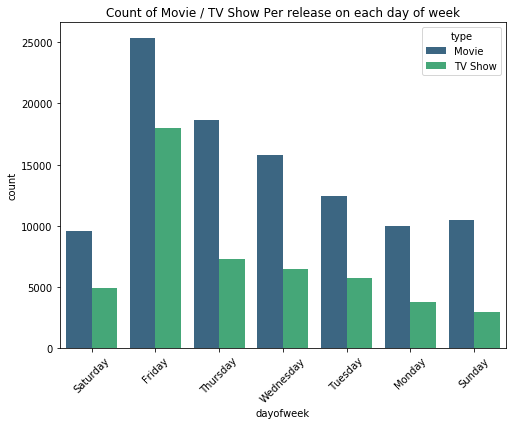

In [40]:
plt.figure(figsize=(8,6))
sns.countplot(data=df_cast_listed_final, x="dayofweek",
palette="viridis",hue="type")
plt.xticks(rotation=45,fontsize=10)
plt.title("Count of Movie / TV Show Per release on each day of week")
plt.show()

Observation: Most of the movies and TV shows are added to system on Friday

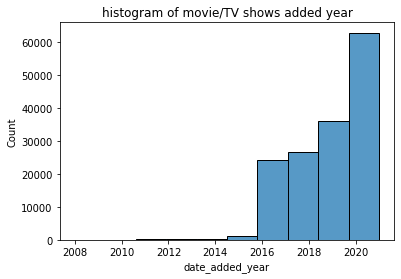

In [41]:
sns.histplot(df_cast_listed_final["date_added_year"], bins=10)
plt.title("histogram of movie/TV shows added year")
plt.show()

Observation: Most of the movies are added in last bin (ie. 2019 to 2021)

In [43]:
df_final_movies = df_cast_listed_final[df_cast_listed_final['type'] == 'Movie']
df_final_movies.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,description,duration_value,new_listed_in,new_cast,dayofweek,date_added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",90,Documentaries,David Attenborough,Saturday,2021
163,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",United States,2021-09-24,2021,PG,91 min,Equestria's divided. But a bright-eyed hero be...,91,Children & Family Movies,Vanessa Hudgens,Friday,2021
164,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",United States,2021-09-24,2021,PG,91 min,Equestria's divided. But a bright-eyed hero be...,91,Children & Family Movies,Kimiko Glenn,Friday,2021
165,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",United States,2021-09-24,2021,PG,91 min,Equestria's divided. But a bright-eyed hero be...,91,Children & Family Movies,James Marsden,Friday,2021
166,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",United States,2021-09-24,2021,PG,91 min,Equestria's divided. But a bright-eyed hero be...,91,Children & Family Movies,Sofia Carson,Friday,2021


In [44]:
df_final_shows = df_cast_listed_final[df_cast_listed_final['type'] == 'TV Show']
df_final_shows.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,description,duration_value,new_listed_in,new_cast,dayofweek,date_added_year
1,s2,TV Show,Blood & Water,Adze Ugah,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2,International TV Shows,Ama Qamata,Friday,2021
2,s2,TV Show,Blood & Water,Adze Ugah,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2,International TV Shows,Khosi Ngema,Friday,2021
3,s2,TV Show,Blood & Water,Adze Ugah,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2,International TV Shows,Gail Mabalane,Friday,2021
4,s2,TV Show,Blood & Water,Adze Ugah,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2,International TV Shows,Thabang Molaba,Friday,2021
5,s2,TV Show,Blood & Water,Adze Ugah,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2,International TV Shows,Dillon Windvogel,Friday,2021


In [45]:
df_final_movies = df_final_movies.astype({"duration_value": int})

df_final_movies.dtypes

show_id                    object
type                       object
title                      object
director                   object
country                    object
date_added         datetime64[ns]
release_year                int64
rating                     object
duration                   object
description                object
duration_value              int64
new_listed_in              object
new_cast                   object
dayofweek                  object
date_added_year             int64
dtype: object

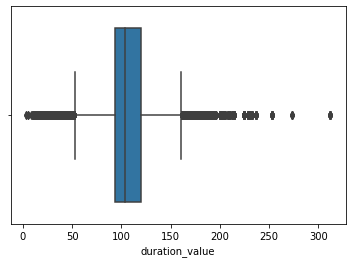

In [46]:
sns.boxplot(data=df_final_movies,
            x="duration_value")
plt.show()

#### Observation:

- Values which are less than 50 and more than 150 are outliers
- Median is Nearer to 100 (Here 100 minutes)
- Most of the movies are in upper Quartile

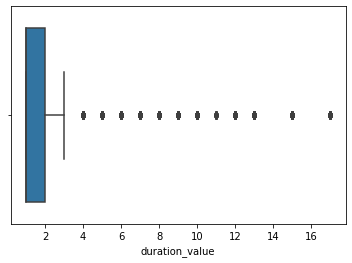

In [47]:
sns.boxplot(data=df_final_shows,
            x="duration_value")
plt.show()

In [50]:
df_final_shows['duration_value'].median()

1.0

#### Observation:

- Here Median is 1.
- there is no data points less than the lower quartile
- All of the movies are in upper Quartile

## Insights and Recommendations

#### Insights

In [54]:
df_cast_listed_final.groupby(['type','new_listed_in'])['title'].nunique().sort_values()

type     new_listed_in            
Movie    LGBTQ Movies                    1
         Sports Movies                   1
TV Show  TV Sci-Fi & Fantasy             1
         Spanish-Language TV Shows       2
Movie    Romantic Movies                 3
                                      ... 
         Documentaries                 829
         Action & Adventure            859
         Comedies                     1210
         Dramas                       1599
          International Movies        2624
Name: title, Length: 73, dtype: int64

- Data contains most movies of Genre International Movies

In [56]:
df_cast_listed_final.groupby('dayofweek')['show_id'].nunique().sort_values()

dayofweek
Sunday        751
Saturday      816
Monday        850
Tuesday      1196
Wednesday    1287
Thursday     1393
Friday       2497
Name: show_id, dtype: int64

- Most of the content (Movie/TV show) added to system on Friday

In [57]:
df_cast_listed_final.groupby(['new_cast','new_listed_in'])['show_id'].nunique().sort_values()

new_cast            new_listed_in        
  Jr.               Comedies                   1
 Pik Sen Lim        British TV Shows           1
                     Kids' TV                  1
 Pii Liu            Dramas                     1
                     International Movies      1
                                            ... 
David Spade         Docuseries                75
 London Hughes      Docuseries                75
 Fortune Feimster   Docuseries                75
David Attenborough   International Movies    150
                    Documentaries            345
Name: show_id, Length: 122132, dtype: int64

- David Attenborough is the one who acted in most of the TV shows and movies

In [58]:
df_cast_listed_final.groupby(['director','new_cast'])['show_id'].nunique().sort_values(ascending=False)

director             new_cast                     
Marcus Raboy          Fortune Feimster                242
                     David Spade                      238
                      London Hughes                   237
Edward Cotterill     David Attenborough                46
Toshiya Shinohara     Takahiro Sakurai                 21
                                                     ... 
Nattawut Poonpiriya  Chutimon Chuengcharoensukying      1
                      Thaneth Warakulnukroh             1
                      Teeradon Supapunpinyo             1
                      Sarinrat Thomas                   1
A. L. Vijay           Hema                              1
Name: show_id, Length: 59273, dtype: int64

- It seems most working out pair of director and cast is Marcus Raboy and Fortune Feimster

In [59]:
df_cast_listed_final.groupby('type').agg({'duration_value': 'mean'})

,duration_value
type,
Movie,107.498363
TV Show,1.884956


- Average Movie duration is 108 min.
- Average TV show seasons is 2

In [60]:
df_final_movies.groupby('new_listed_in')['title'].nunique().sort_values(ascending=False)

new_listed_in
 International Movies        2624
Dramas                       1599
Comedies                     1210
Action & Adventure            859
Documentaries                 829
 Dramas                       827
 Independent Movies           736
 Romantic Movies              613
Children & Family Movies      605
 Thrillers                    512
 Comedies                     464
 Music & Musicals             357
Stand-Up Comedy               334
Horror Movies                 275
 Sci-Fi & Fantasy             230
 Sports Movies                218
International Movies          128
 LGBTQ Movies                 101
 Horror Movies                 82
Classic Movies                 80
 Faith & Spirituality          65
Thrillers                      65
 Cult Movies                   59
Movies                         53
 Anime Features                50
 Documentaries                 40
 Classic Movies                36
 Children & Family Movies      36
Anime Features                 21


#### Observation : 
- Most of the movie are International Movies

In [61]:
df_final_shows.groupby('new_listed_in')['title'].nunique().sort_values(ascending=False)

new_listed_in
International TV Shows           773
 TV Dramas                       695
 International TV Shows          576
 TV Comedies                     454
Crime TV Shows                   399
Kids' TV                         385
 Romantic TV Shows               338
British TV Shows                 252
Docuseries                       220
 Docuseries                      174
Anime Series                     174
 Spanish-Language TV Shows       171
 Korean TV Shows                 151
 Reality TV                      135
 TV Action & Adventure           128
Reality TV                       120
TV Comedies                      119
 TV Mysteries                     98
 Science & Nature TV              92
 TV Sci-Fi & Fantasy              82
 Crime TV Shows                   70
 Teen TV Shows                    69
TV Dramas                         67
 TV Horror                        64
 Kids' TV                         63
 TV Thrillers                     57
TV Action & Adventure   

#### Observation : 
- Most of the shows are International TV Shows

## Recommandations:

- As per data, Most of the movies are added on Friday. So If we add any new movie or TV show on friday we may observe most of the views

- As per data, Average movie time is 108 minutes and TV show seasons is 2. So while adding new content to the system we make sure that duration should not exceed these limits

- Based on watching history genre/cast of user, we can suggest user to watch similar type of shows (As we have new_listed_in column)

- Based on user when to watching movie / TV show ( I mean which day on week) mostly using, so that we can send notifications to the user on that day (As we have dayofweek column)

- Most of the movie are International Movies Genre and Most of the TV shows are International TV Shows Genre, So while researching about content to add to the syste we can consider this point